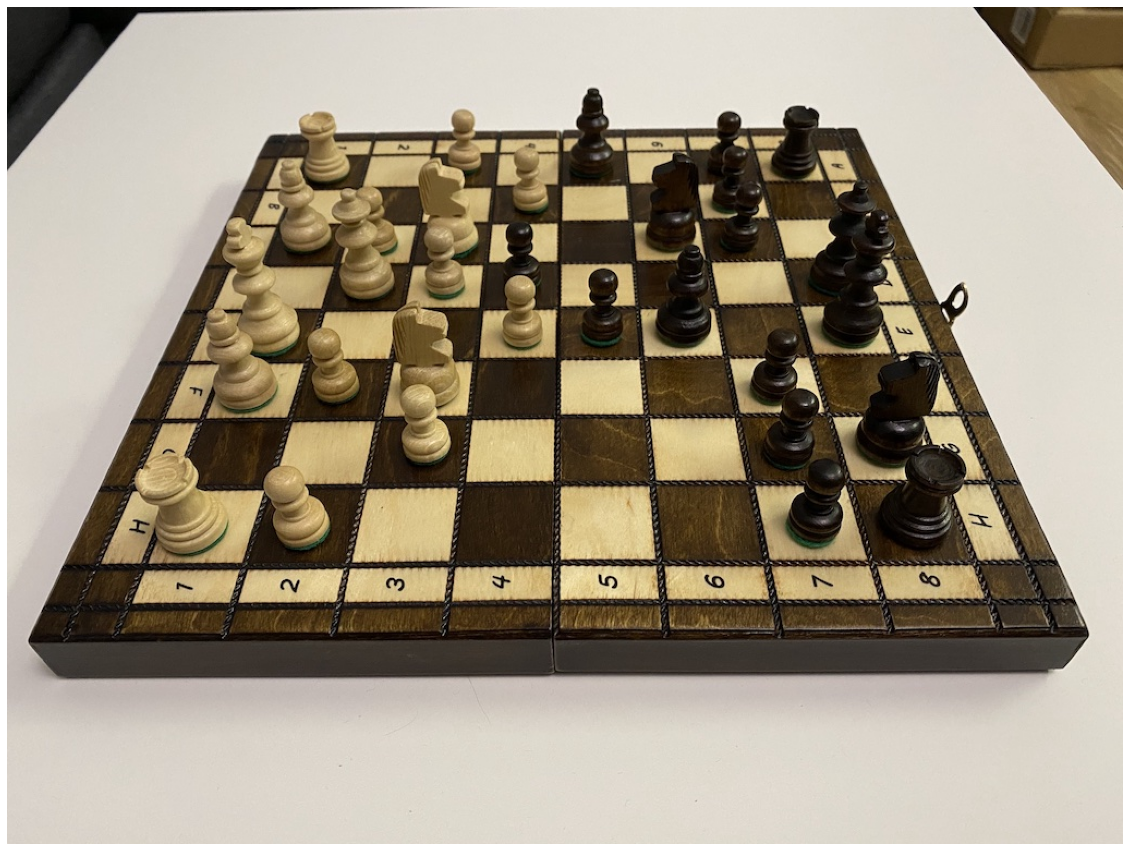

In [1]:
# @formatter:off
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# @formatter:on

import cv2 as cv
import numpy as np
import math

from utils import show_image, group_lines, draw_lines, distinct_colors, process_hough_lines, show_lines

img = cv.imread('images/chess.jpg')
show_image(img)
original_img = img.copy()

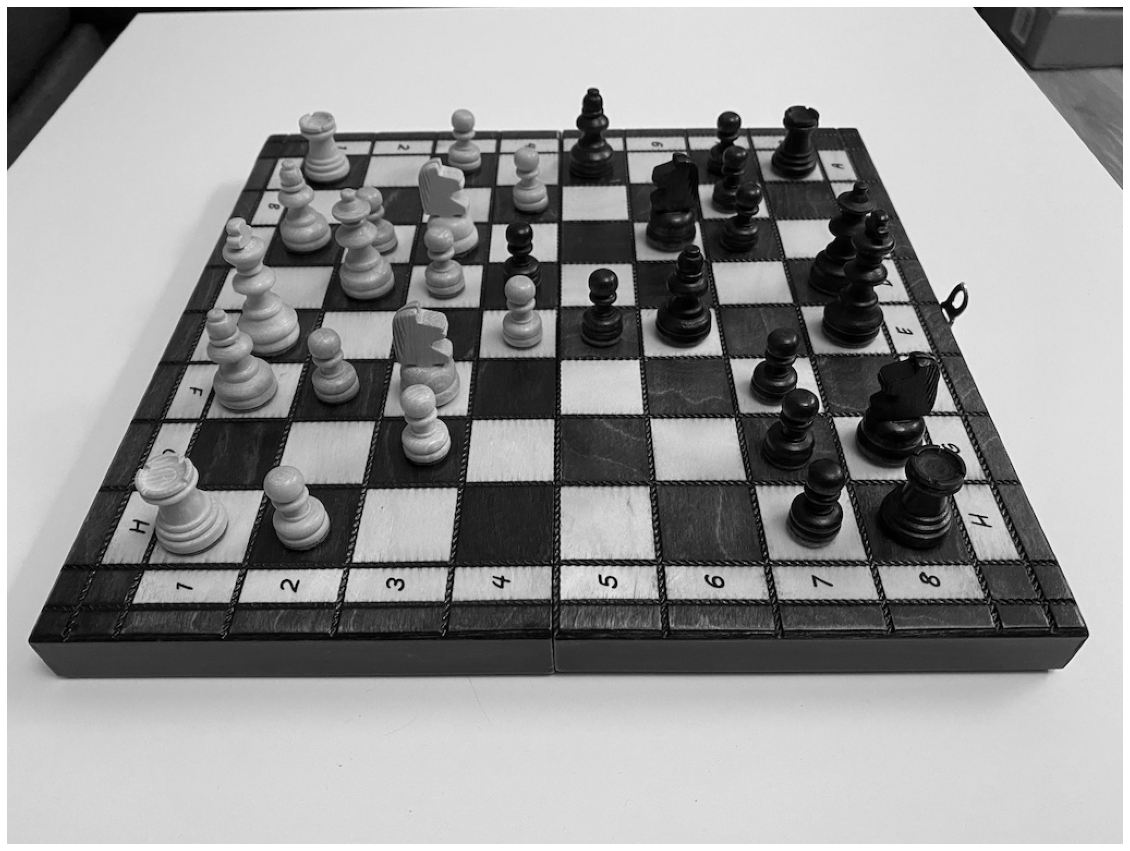

In [2]:
# grayscale image
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_image(img)

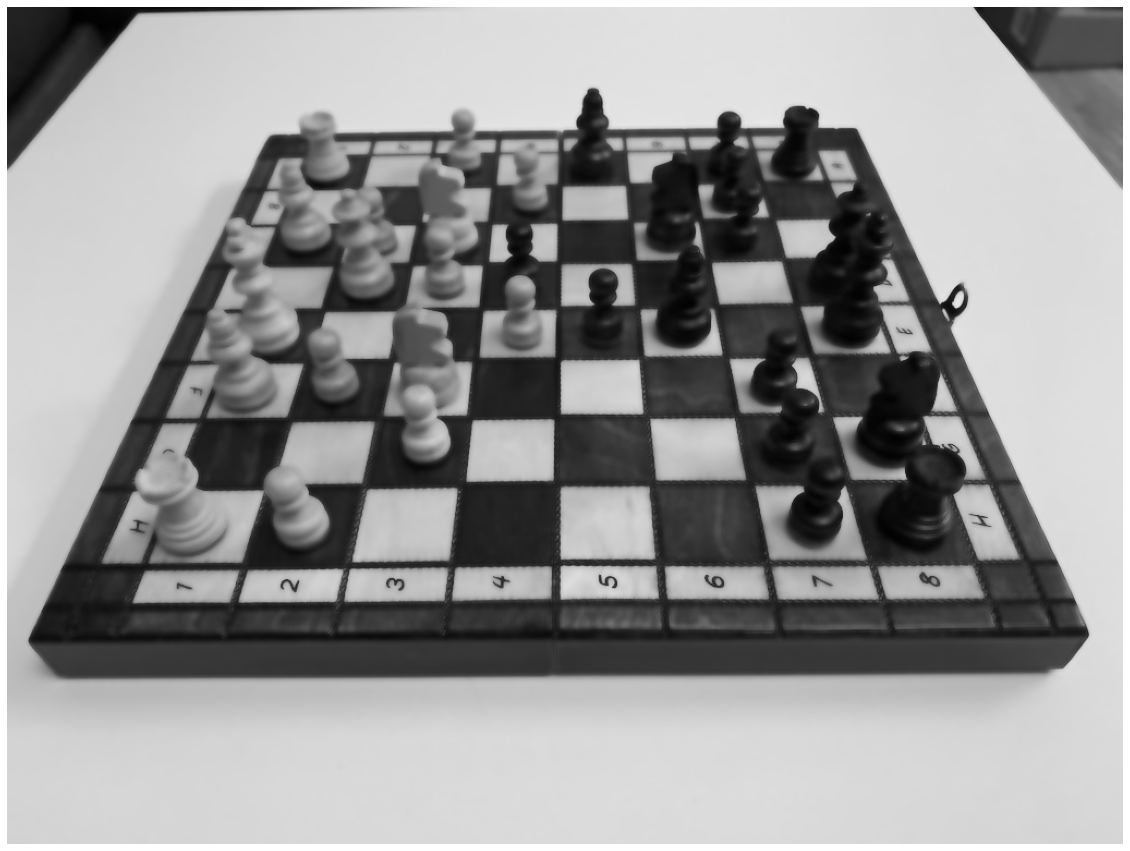

In [3]:
# smooth with bilateral filter
img = cv.bilateralFilter(img, 9, 90, 75)
show_image(img)


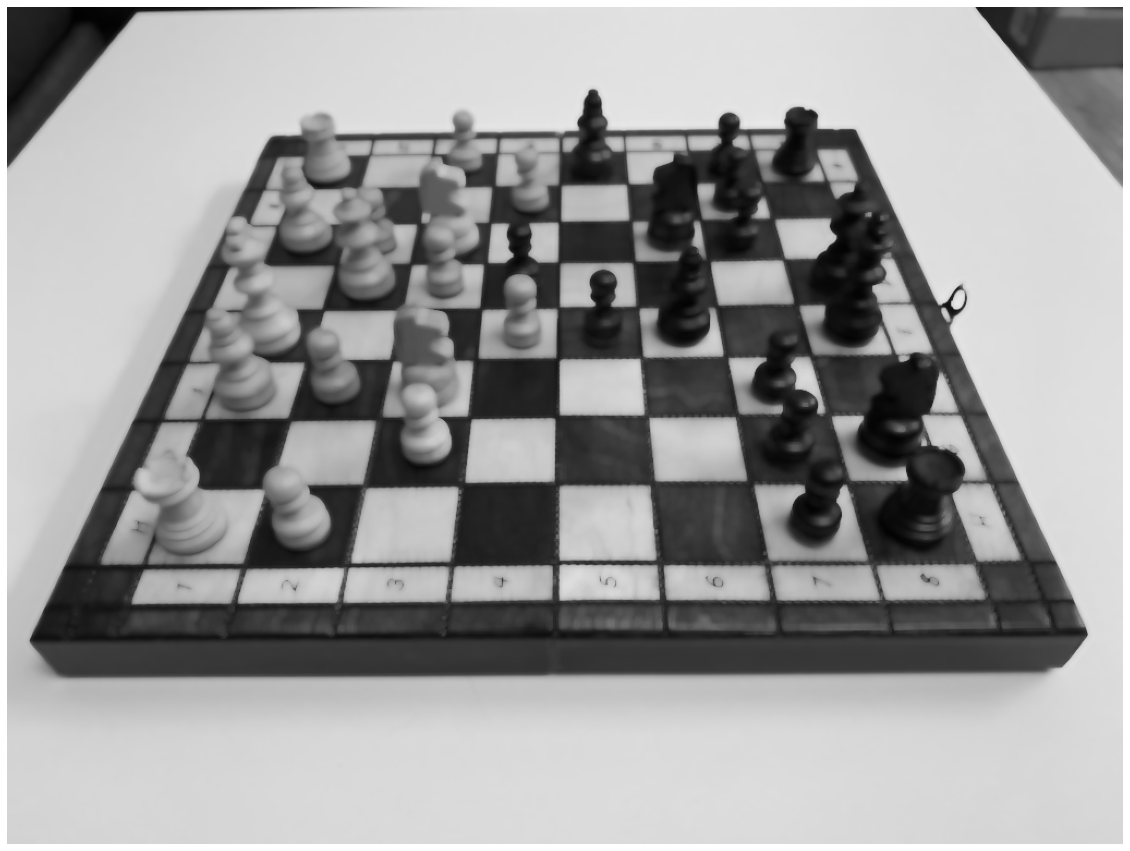

In [4]:
# dilate
img = cv.dilate(img, None, iterations=1)
show_image(img)

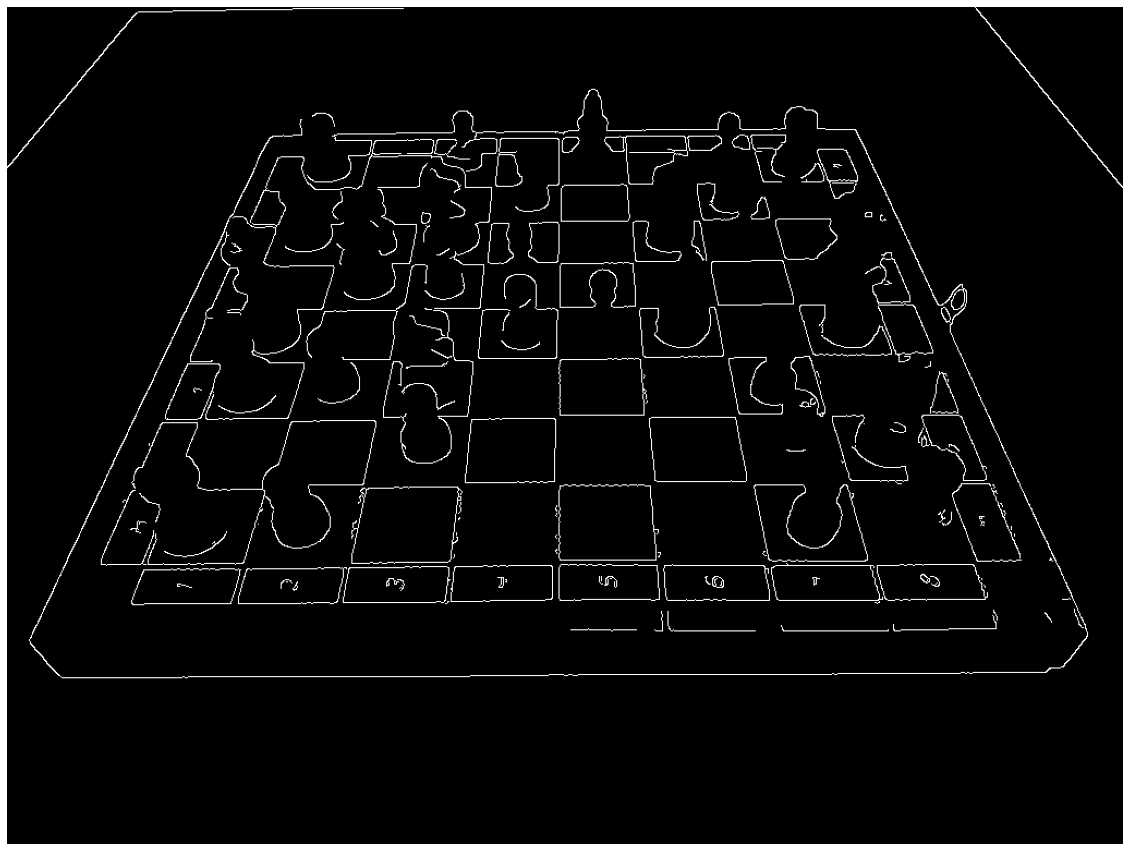

In [5]:
# Canny edge detection
edges = cv.Canny(img, 100, 200)
show_image(edges)

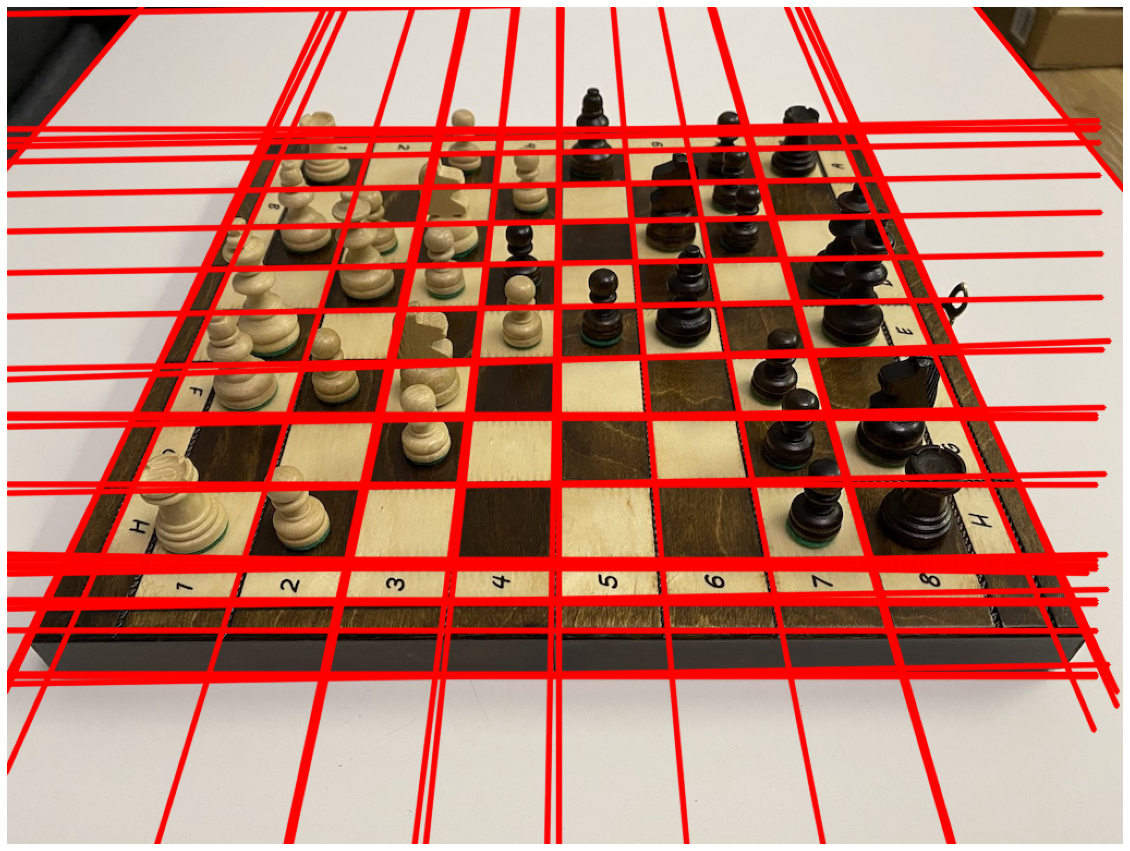

In [6]:
# Hough lines
lines = process_hough_lines(cv.HoughLines(edges, 1, np.pi / 180, 120, None, 0, 0))

lines_img = original_img.copy()

draw_lines(lines, lines_img, (0, 0, 255))

show_image(lines_img)

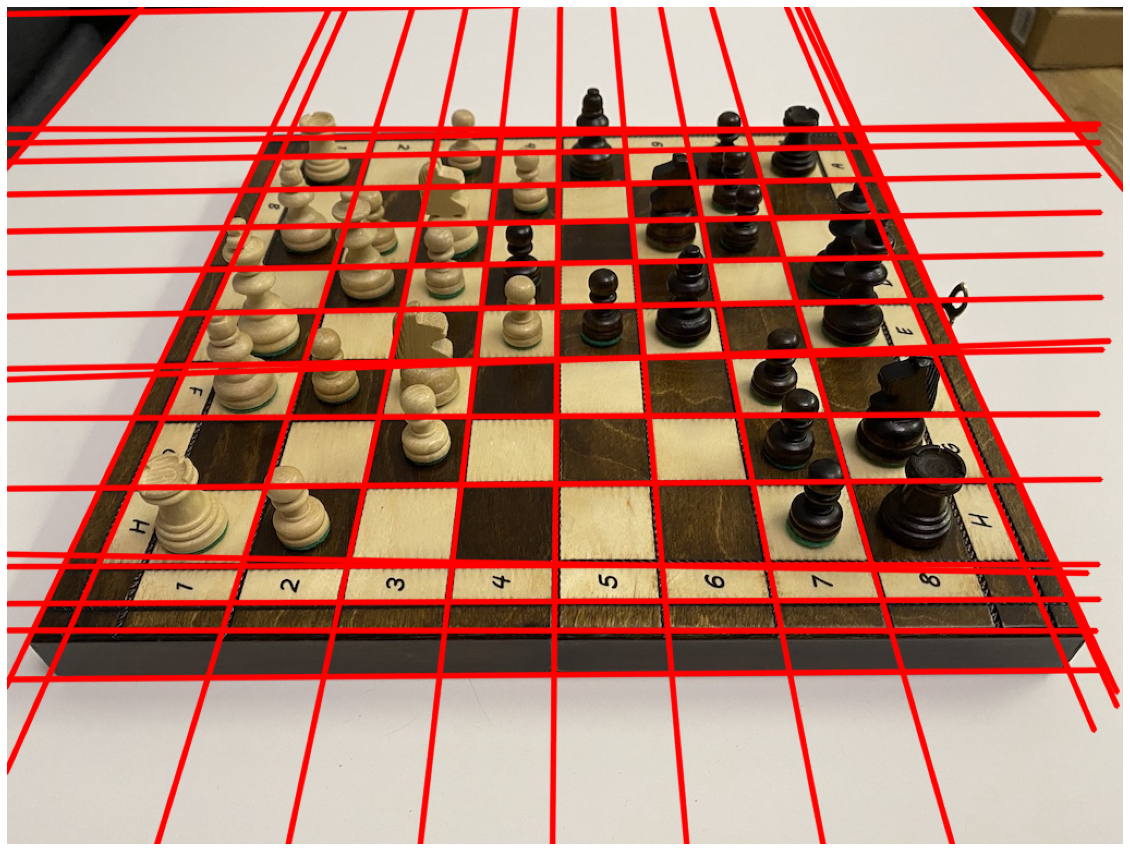

In [7]:
# group similar lines
grouped_lines = group_lines(lines, rho_threshold=10, theta_threshold=np.pi / 90)

grouped_lines_img = original_img.copy()
draw_lines(grouped_lines, grouped_lines_img, (0, 0, 255))
show_image(grouped_lines_img)

TypeError: map() must have at least two arguments.

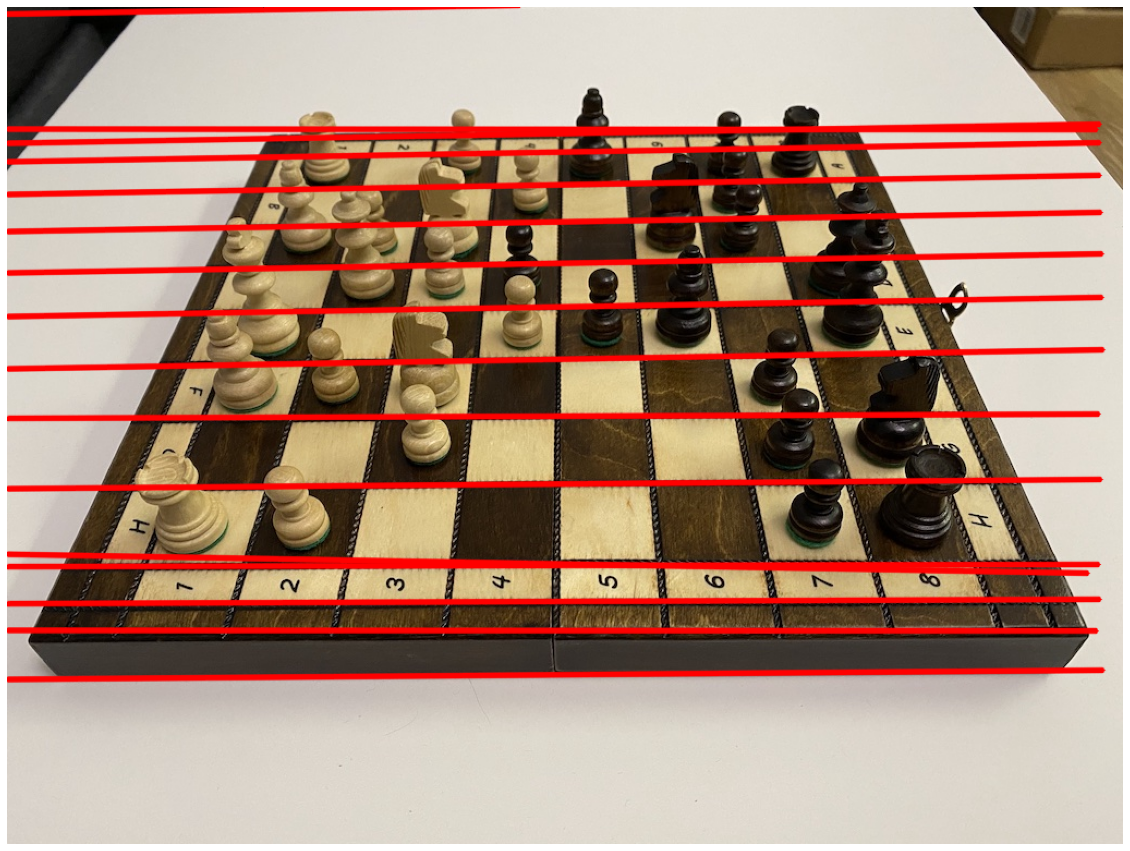

In [8]:
# detect horizontal lines

horizontal_theta_threshold = np.pi / 180
horizontal_theta = np.pi / 2
horizontal_lines = list(filter(lambda l: abs(l.theta - horizontal_theta) < horizontal_theta_threshold, grouped_lines))
show_lines(horizontal_lines, original_img, (0, 0, 255))

average = sum(map(lambda l: l.theta, horizontal_lines)) / len(horizontal_lines)
lines_average = sorted(map(lambda l: (l, abs(l.theta - average))))

In [ ]:
# group lines by theta
line_groups = []
for line in grouped_lines:
    found = False
    for group in line_groups:
        if abs(group[0] - line.theta) < math.pi / 180:
            group[0] = (group[0] + line.theta) / 2
            group[1].append(line)
            found = True
            break

    if not found:
        line_groups.append([line.theta, [line]])

theta_lines_img = original_img.copy()
for group, color in zip(line_groups, distinct_colors(len(line_groups))):
    draw_lines(group[1], theta_lines_img, color)

show_image(theta_lines_img)
